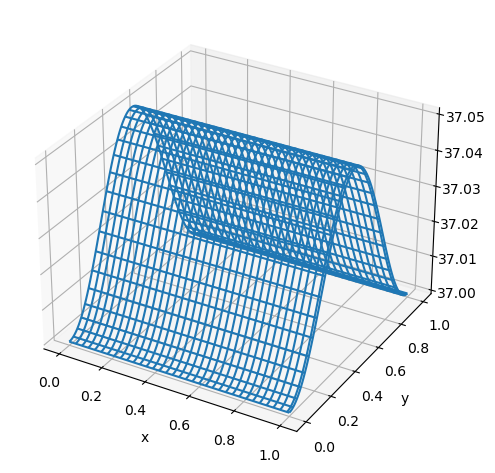

In [31]:
import matplotlib.pyplot as plt
import numpy as np


h = 0.01
x = np.arange(0, 1+h/2, h)
y = np.arange(0, 1+h/2, h)

tam = len(x)

#monta a matriz T para cada coluna do domínio
T = np.zeros((tam, tam))
T[0,0] = -4
T[0,1] = 2
for i in range(1, tam-1):
    T[i,i] = -4
    T[i,i+1] = 1
    T[i,i-1] = 1

T[tam-1, tam-1] = -4
T[tam-1, tam-2] = 2

#print(T)

I = np.eye(tam)
A1 = np.kron(I, T)

#print(A1)

e2 = np.diag(np.ones(tam-1), -1) + np.diag(np.ones(tam-1), 1)

# As condições de Neumann para as bordas B, C e D são
# mantidas, e já estão embutidas na matriz A.
e2[0,1] = 0
e2[-1,-2] = 0

#print(e2)

A2 = np.kron(e2, I)

#print(A2)

e3 = np.zeros((tam, tam))
e3[0,1] = 1
e3[tam-1,tam-2] = 1

#print(e3)

A3 = np.kron(e3, 2*I)

A = A1 + A2 + A3

# Nova seção: aplicando condição de Dirichlet u = 37 para a borda A (x=0)
for j in range(tam):
    # A linha i*tam+j corresponde ao ponto (x_i, y_j)
    # A borda A corresponde a i=0, ou seja, x=0
    indice_da_linha = 0 * tam + j
    A[indice_da_linha,:] = 0
    A[indice_da_linha, indice_da_linha] = 1


f = np.zeros(tam*tam)

# f representa o lado direito da equação de Poisson
for i in range(tam):
    for j in range(tam):
        f[i*tam + j] = np.cos(2*np.pi*x[i])

f *= h**2

# Agora, definimos o valor de f na fronteira A (x=0) como 37
for j in range(tam):
    f[0*tam + j] = 37

u_sl = np.linalg.solve(A, f)

x, y = np.meshgrid(x, y)

u = np.zeros((tam, tam))
for i in range(tam):
    for j in range(tam):
        u[i,j] = u_sl[i*tam + j]

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(x, y, u)
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout()
plt.show()